#KNN

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.preprocessing import LabelEncoder
data=pd.read_csv('/content/drive/MyDrive/IA in geo/data.csv',index_col=0)
le=LabelEncoder()

In [ ]:
data["cover"]=le.fit_transform(data["cover"])
data=data.sample(n = 380000)
X=data.drop(['class'],axis=1)
y=data['class']
print(X.shape)
print(y.shape)

(380000, 9)
(380000,)


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus=RandomUnderSampler(sampling_strategy=0.5)
X,y=rus.fit_resample(X,y)
X

,cover,slope,ev,pre,rad,soilH,2mT,skinT,soilT
0,5,250.00381,-0.001504,0.001564,6021362.0,0.447197,299.55927,299.60500,299.79233
1,5,5321.32400,-0.001178,0.002614,4025008.8,0.475274,297.94980,297.83957,298.74155
2,1,743.52496,-0.000940,0.000060,6424396.5,0.228868,303.69320,305.86124,306.21237
3,1,1053.87800,-0.001311,0.000382,5025407.0,0.322328,300.83817,301.45502,301.94638
4,5,5126.63300,-0.000885,0.002158,3012658.8,0.473603,296.05160,295.92105,296.85257
...,...,...,...,...,...,...,...,...,...
2263,1,197.64537,-0.001365,0.000005,5835027.5,0.246182,300.54965,300.76596,301.10400
2264,1,749.17760,-0.001079,0.003105,4067342.0,0.275154,300.79822,301.49557,302.91653
2265,4,254.95486,-0.001057,0.000000,6571444.0,0.210939,304.23157,305.14960,305.63327
2266,1,279.51276,-0.000602,0.000062,5129566.0,0.199948,303.09690,305.14203,305.68765


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=58)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=58)

In [ ]:
y_pred=knn.predict(X_test)
y_pred[:1000]

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,

Para obtener la probabilidad de cada clase se utiliza la función proba:

In [ ]:
prediction_proba=knn.predict_proba(X_test)
prediction_proba[:10,:]

array([[0.56896552, 0.43103448],
       [0.75862069, 0.24137931],
       [0.77586207, 0.22413793],
       [0.62068966, 0.37931034],
       [0.46551724, 0.53448276],
       [0.39655172, 0.60344828],
       [0.43103448, 0.56896552],
       [0.5862069 , 0.4137931 ],
       [0.89655172, 0.10344828],
       [0.43103448, 0.56896552]])

In [ ]:
print(knn.score(X_test,y_test))

0.6806167400881057


In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
kfold = ShuffleSplit(n_splits=5)
results = cross_val_score(knn, X_train, y_train, cv=kfold)
print(results.mean())
print(results.std())

0.6912087912087912
0.03516483516483516


In [ ]:
y_train_pred=knn.predict(X_train)
from sklearn.metrics import classification_report
print('Accuracy de LDA para validación: {:.2f}'.format(knn.score(X_test, y_test)))

# print(classification_report(y_train,y_train_pred))
print(classification_report(y_test,y_pred))


Accuracy de LDA para validación: 0.68
              precision    recall  f1-score   support

           0       0.76      0.78      0.77       308
           1       0.50      0.48      0.49       146

    accuracy                           0.68       454
   macro avg       0.63      0.63      0.63       454
weighted avg       0.68      0.68      0.68       454



[[970 234]
 [309 301]]
[[239  69]
 [ 76  70]]


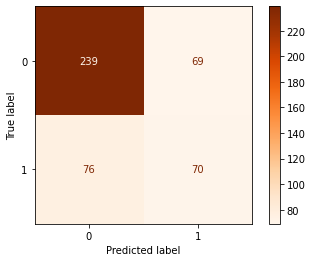

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train,y_train_pred))
print(confusion_matrix(y_test,y_pred))
from sklearn.metrics import ConfusionMatrixDisplay,precision_score,recall_score,confusion_matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,cmap="Oranges")
plt.grid(False)

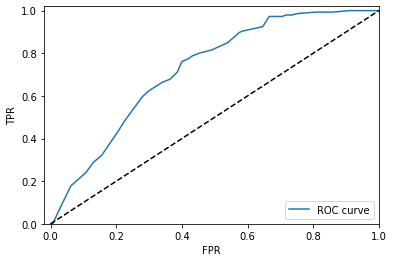

In [ ]:
from sklearn.metrics import roc_curve
probs=knn.predict_proba(X_test)
y_pred_proba = probs[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr, label='ROC curve')
plt.plot([0,1],[0,1],'k--')
plt.xlim([-0.02,1.0])
plt.ylim([0.0,1.02])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc=4);

In [ ]:
from sklearn.metrics import accuracy_score 
print('Precision para entrenamiento:',accuracy_score(y_train,y_train_pred))
print('Precision para validacion:',accuracy_score(y_test,y_pred))

Precision para entrenamiento: 0.7006615214994487
Precision para validacion: 0.6806167400881057


Como se puede observar en la implementacion de KNN, existen tres hiperparámetros que deben evaluarse. Uno de los hiperparámetros importantes es el número K. A continuación se utilizará la curva de validación para determinar el valor de K óptimo.

Un K de 8 presenta resultados ligeramente mejores. Gráficamente los resultados se observan de la siguiente manera:

In [ ]:
X_train[['cover','rad']]

,cover,rad
679,1,5489610.5
1215,1,4342332.5
623,5,5246584.5
1330,5,5700638.0
627,1,3825309.2
...,...,...
960,5,5034227.5
905,5,3947950.0
1096,1,6514348.5
235,5,5202534.5


Para seleccionar los mejores hiperparametros simultaneamente se puede utilizar el metodo *gridsearch*. Inicialmente se crea una lista con el rango de valores que se desea evalaur para cada hiperparámetro. en este caso evaluaremos *leaf_size*, n_neighbors* y *p*. La distancia Minkowski es utilizada por defecto, la cual corresponde a una generalizacion de la distancia Euclidiana (para variables que esten en la misma escala) o la distancia Manhattan (cuando las variables difieran en sus escalas).

In [ ]:
#Hiperparametros a evaluar.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,10))
p=[1,2]

#Realizar un diccionario con los valores a evaluar.
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

In [ ]:
from sklearn.model_selection import GridSearchCV
knn_2 = KNeighborsClassifier()
clf = GridSearchCV(knn_2, hyperparameters, cv=kfold)
best_model = clf.fit(X_train,y_train)
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 2


In [ ]:
knn_best=KNeighborsClassifier(n_neighbors=9, leaf_size=1, p=3)
knn_best.fit(X_train,y_train)
y_pred=knn_best.predict(X_test)
print('Accuracy de KNN para validación: {:.2f}'.format(knn_best.score(X_test, y_test)))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))


Accuracy de KNN para validación: 0.68
              precision    recall  f1-score   support

           0       0.75      0.78      0.77       308
           1       0.50      0.46      0.48       146

    accuracy                           0.68       454
   macro avg       0.62      0.62      0.62       454
weighted avg       0.67      0.68      0.67       454

[[240  68]
 [ 79  67]]


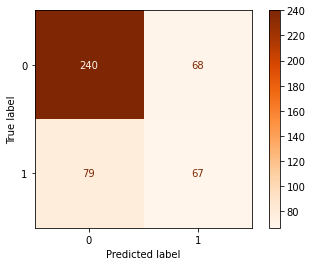

In [ ]:
 from sklearn.metrics import ConfusionMatrixDisplay,precision_score,recall_score,confusion_matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,cmap="Oranges")
plt.grid(False)

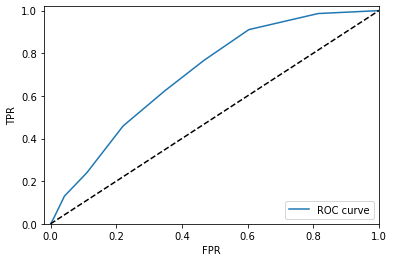

In [ ]:
from sklearn.metrics import roc_curve
probs=knn_best.predict_proba(X_test)
y_pred_proba = probs[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr, label='ROC curve')
plt.plot([0,1],[0,1],'k--')
plt.xlim([-0.02,1.0])
plt.ylim([0.0,1.02])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc=4);